In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt                               
import os 
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
matplotlib.rcParams["figure.dpi"] = 150
from particle import PDGID

In [2]:
datadir = '/home/elizahoward/cmspix28-mc-sim/MuC_Output_BfieldTest/'

In [3]:
truthBIB = pd.DataFrame()
recon2DBIB = pd.DataFrame()
truthSIG = pd.DataFrame()
recon2DSIG = pd.DataFrame()

for file in os.listdir(datadir):
    if "labels" in file:
        if "bib" in file: 
            truthBIB = pd.concat([truthBIB,pd.read_parquet(f"{datadir}{file}")])
            file = file.replace("labels","recon2D")
            recon2DBIB = pd.concat([recon2DBIB,pd.read_parquet(f"{datadir}{file}")])
        elif "sig" in file: 
            truthSIG = pd.concat([truthSIG,pd.read_parquet(f"{datadir}{file}")])
            file = file.replace("labels","recon2D")
            recon2DSIG = pd.concat([recon2DSIG,pd.read_parquet(f"{datadir}{file}")])

/home/daq/venv/lib64/python3.9/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


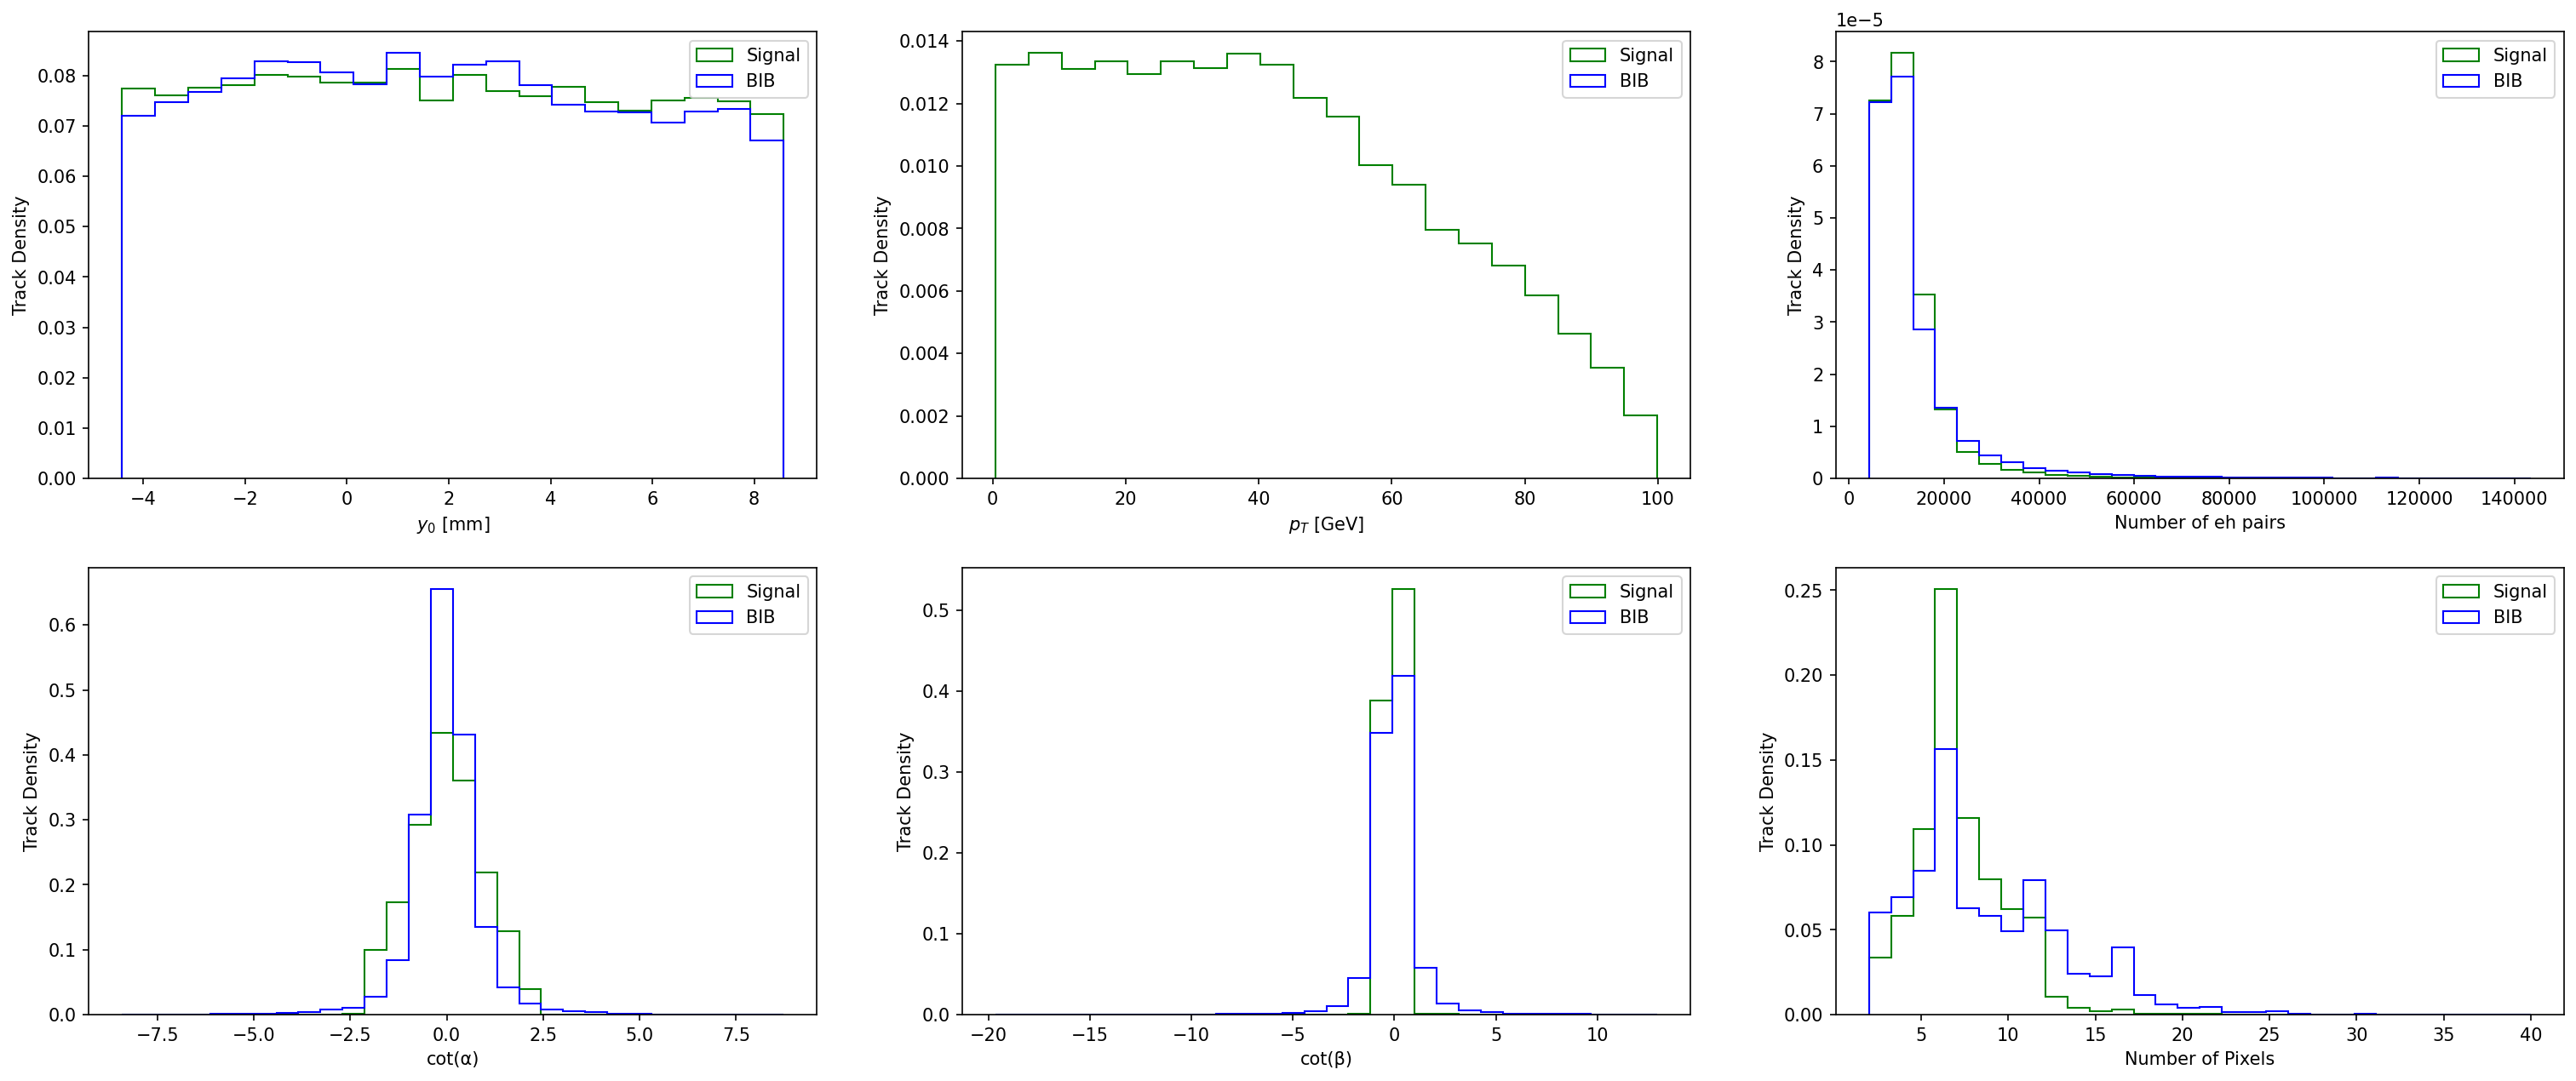

In [4]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(25,10))
n, bins, patches = ax[0,0].hist(truthSIG['y-local'],bins=20,histtype='step',color='g',align='mid',density=True,label="Signal")
ax[0,0].hist(truthBIB['y-local'],bins=bins,histtype='step',color='b',align='mid',density=True,label="BIB")
ax[0,0].set_xlabel(r'$y_0$ [mm]')
ax[0,0].set_ylabel('Track Density')
ax[0,0].legend()

n, bins, patches = ax[0,1].hist(truthSIG['pt'],bins=20,histtype='step',color='g',align='mid',density=True,label="Signal")
ax[0,1].hist(truthBIB['pt'],bins=bins,histtype='step',color='b',align='mid',density=True,label="BIB")
ax[0,1].set_xlabel(r'$p_T$ [GeV]')
ax[0,1].set_ylabel('Track Density')
ax[0,1].legend()

n, bins, patches = ax[1,0].hist(truthSIG['cotAlpha'],bins=30,histtype='step',color='g',align='mid',density=True,label="Signal")
ax[1,0].hist(truthBIB['cotAlpha'],bins=bins,histtype='step',color='b',align='mid',density=True,label="BIB")
ax[1,0].set_xlabel(f'cot(\u03B1)')
ax[1,0].set_ylabel('Track Density')
ax[1,0].legend()

n, bins, patches = ax[1,1].hist(truthSIG['cotBeta'],bins=30,histtype='step',color='g',align='mid',density=True,label="Signal")
ax[1,1].hist(truthBIB['cotBeta'],bins=bins,histtype='step',color='b',align='mid',density=True,label="BIB")
ax[1,1].set_xlabel(f'cot(\u03B2)')
ax[1,1].set_ylabel('Track Density')
ax[1,1].legend()

n, bins, patches = ax[0,2].hist(truthSIG['number_eh_pairs'],bins=30,histtype='step',color='g',align='mid',density=True,label="Signal")
ax[0,2].hist(truthBIB['number_eh_pairs'],bins=bins,histtype='step',color='b',align='mid',density=True,label="BIB")
ax[0,2].set_xlabel('Number of eh pairs')
ax[0,2].set_ylabel('Track Density')
ax[0,2].legend()

n, bins, patches = ax[1,2].hist(nPixelsSIG,bins=30,histtype='step',color='g',align='mid',density=True,label="Signal")
ax[1,2].hist(nPixelsBIB,bins=bins,histtype='step',color='b',align='mid',density=True,label="BIB")
ax[1,2].set_xlabel('Number of Pixels')
ax[1,2].set_ylabel('Track Density')
ax[1,2].legend()

plt.show()

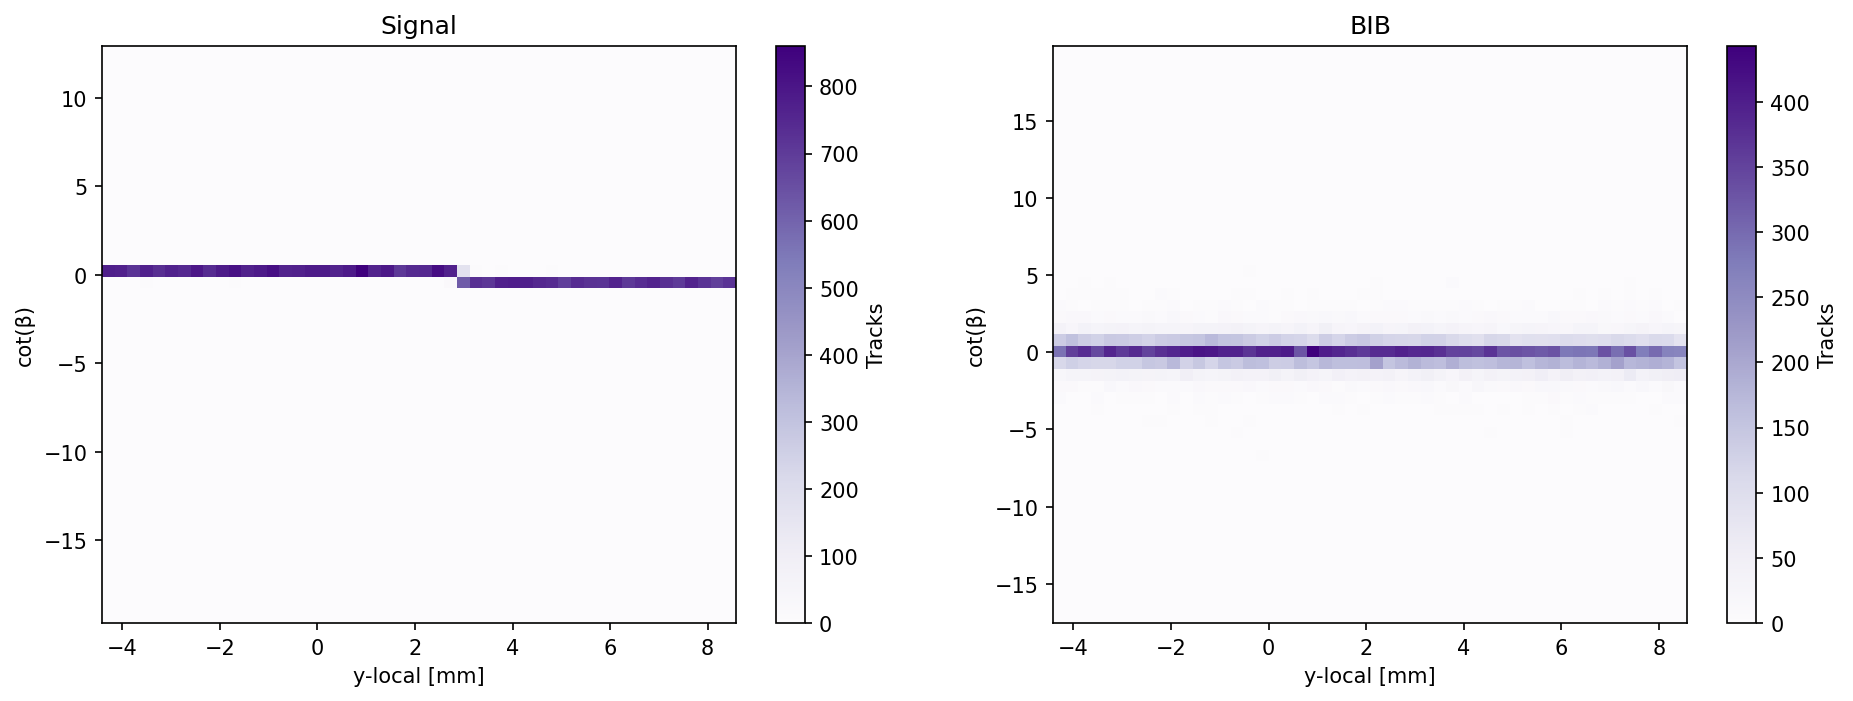

In [5]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))
hg1=ax[0].hist2d(truthSIG['y-local'],truthSIG['cotBeta'],bins=50, cmap='Purples')
fig.colorbar(hg1[3],label='Tracks', ax=ax[0])
ax[0].set_title("Signal")
ax[0].set_xlabel("y-local [mm]")
ax[0].set_ylabel("cot(\u03B2)")

hg2=ax[1].hist2d(truthBIB['y-local'],truthBIB['cotBeta'],bins=50, cmap='Purples')
fig.colorbar(hg2[3],label='Tracks', ax=ax[1])
ax[1].set_title("BIB")
ax[1].set_xlabel("y-local [mm]")
ax[1].set_ylabel("cot(\u03B2)")

plt.show()

In [6]:
truthSigHigh = truthSIG[truthSIG['pt']>95]
recon2DSigHigh = recon2DSIG[truthSIG['pt']>95]

truthSigLow = truthSIG[truthSIG['pt']<5]
recon2DSigLow = recon2DSIG[truthSIG['pt']<5]

In [7]:
# optional: cut out abs(cot(alpha)) and abs(cot(beta)) > 10
cut1 = truthSigHigh['cotAlpha'] < 10
cut2 = truthSigHigh['cotAlpha'] > -10
truthSigHigh = truthSigHigh[cut1&cut2]
recon2DSigHigh = recon2DSigHigh[cut1&cut2]

cut1 = truthSigLow['cotAlpha'] < 10
cut2 = truthSigLow['cotAlpha'] > -10
truthSigLow = truthSigLow[cut1&cut2]
recon2DSigLow = recon2DSigLow[cut1&cut2]

In [8]:
truthSigLowPos = truthSigLow[truthSigLow['PID']>0]
recon2DSigLowPos = recon2DSigLow[truthSigLow['PID']>0]

truthSigLowNeg = truthSigLow[truthSigLow['PID']<0]
recon2DSigLowNeg = recon2DSigLow[truthSigLow['PID']<0]

Text(0, 0.5, 'cot(β)')

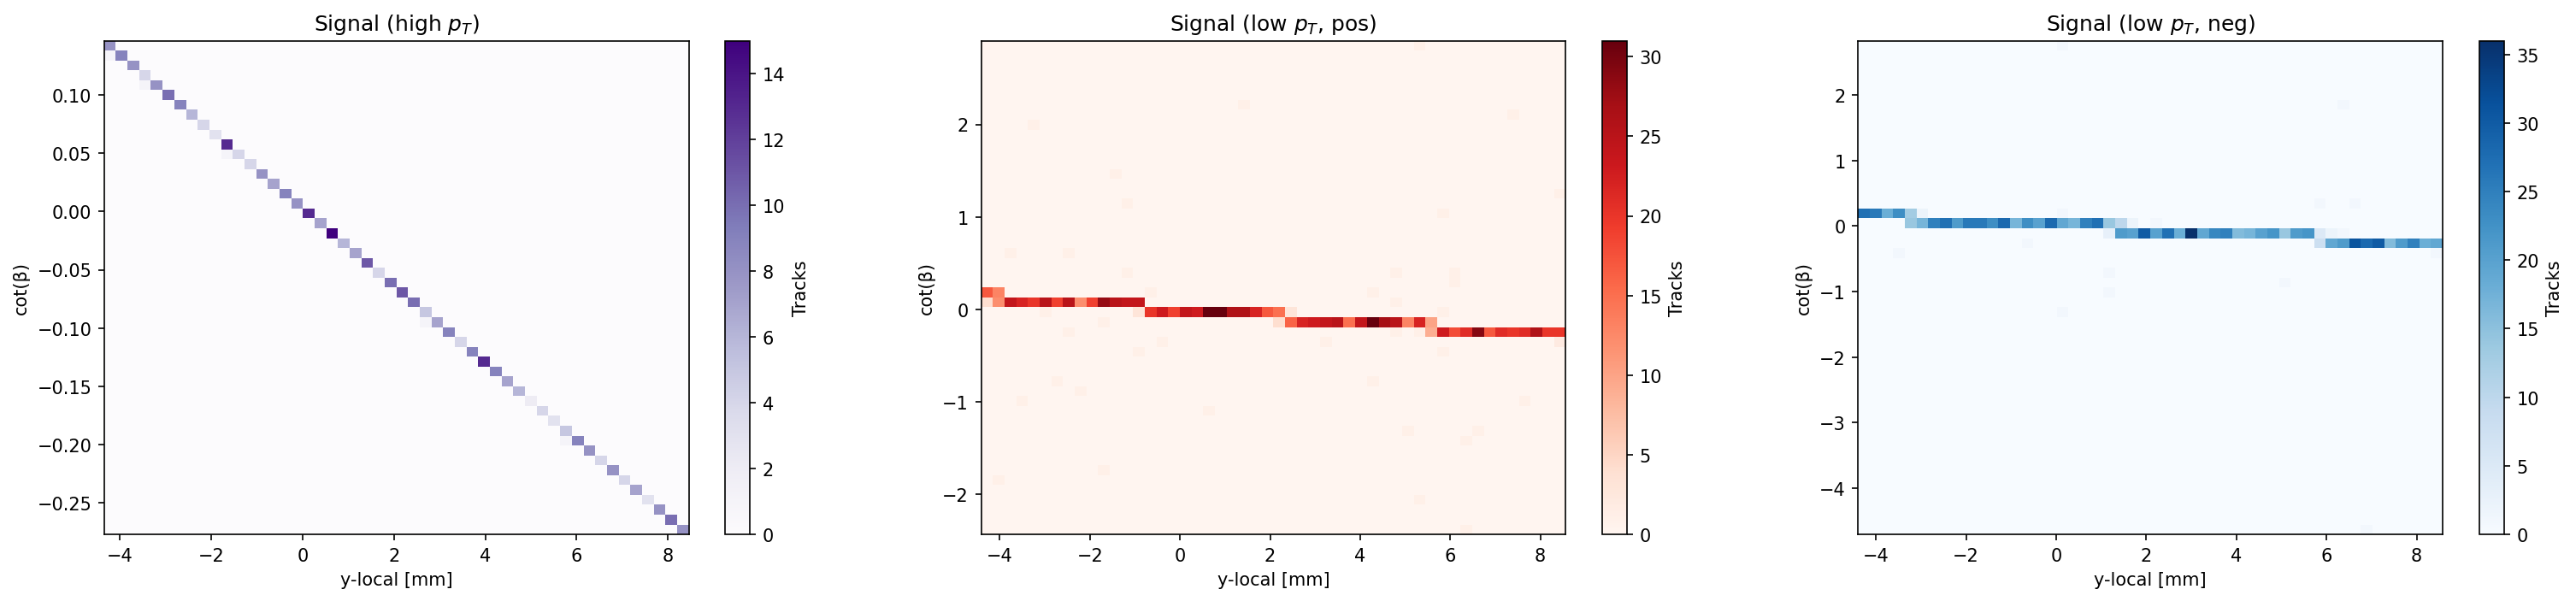

In [9]:
fig, ax = plt.subplots(ncols=3,figsize=(25,5))
hg1=ax[0].hist2d(truthSigHigh['y-local'],truthSigHigh['cotBeta'],bins=50, cmap='Purples')
fig.colorbar(hg1[3],label='Tracks', ax=ax[0])
ax[0].set_title(r"Signal (high $p_T$)")
ax[0].set_xlabel("y-local [mm]")
ax[0].set_ylabel("cot(\u03B2)")

hg3=ax[1].hist2d(truthSigLowPos['y-local'],truthSigLowPos['cotBeta'],bins=50, cmap='Reds')
fig.colorbar(hg3[3],label='Tracks', ax=ax[1])
ax[1].set_title(r"Signal (low $p_T$, pos)")
ax[1].set_xlabel("y-local [mm]")
ax[1].set_ylabel("cot(\u03B2)")

hg4=ax[2].hist2d(truthSigLowNeg['y-local'],truthSigLowNeg['cotBeta'],bins=50, cmap='Blues')
fig.colorbar(hg4[3],label='Tracks', ax=ax[2])
ax[2].set_title(r"Signal (low $p_T$, neg)")
ax[2].set_xlabel("y-local [mm]")
ax[2].set_ylabel("cot(\u03B2)")

#fig.tight_layout(pad=2)

In [10]:
def getProfiles(clusters):
    profiles = np.sum(clusters, axis = 2)
    totalCharge = np.sum(profiles, axis = 1, keepdims=True)
    return profiles/totalCharge

def getAverageProfile(clusters):
    clusters = clusters.to_numpy().reshape(clusters.shape[0],13,21)
    profiles=getProfiles(clusters)
    return np.mean(profiles, axis=0)

def getClusterSizes(clusters):
    profiles=getProfiles(clusters)
    bool_arr = profiles != 0
    return np.sum(bool_arr, axis = 1)

def getAverageClusterSize(clusters):
    clusters = clusters.to_numpy().reshape(clusters.shape[0],13,21)
    clusterSizes = getClusterSizes(clusters)
    return np.mean(clusterSizes)

In [11]:
# Seperate into out by ylocal

recon2DHigh1 = recon2DSigHigh[truthSigHigh['y-local']<-2]
cut1 = truthSigHigh['y-local']>1
cut2 = truthSigHigh['y-local']<3
cut = cut1 & cut2
recon2DHigh2 = recon2DSigHigh[cut]
recon2DHigh3 = recon2DSigHigh[truthSigHigh['y-local']>6]

recon2DLowPos1 = recon2DSigLowPos[truthSigLowPos['y-local']<-2]
cut1 = truthSigLowPos['y-local']>1
cut2 = truthSigLowPos['y-local']<3
cut = cut1 & cut2
recon2DLowPos2 = recon2DSigLowPos[cut]
recon2DLowPos3 = recon2DSigLowPos[truthSigLowPos['y-local']>6]

recon2DLowNeg1 = recon2DSigLowNeg[truthSigLowNeg['y-local']<-2]
cut1 = truthSigLowNeg['y-local']>1
cut2 = truthSigLowNeg['y-local']<3
cut = cut1 & cut2
recon2DLowNeg2 = recon2DSigLowNeg[cut]
recon2DLowNeg3 = recon2DSigLowNeg[truthSigLowNeg['y-local']>6]

#Convert to clusters and then y-profiles

profileLowPos1 = getAverageProfile(recon2DLowPos1)
profileLowNeg1 = getAverageProfile(recon2DLowNeg1)
profileHigh1 = getAverageProfile(recon2DHigh1)

profileLowPos2 = getAverageProfile(recon2DLowPos2)
profileLowNeg2 = getAverageProfile(recon2DLowNeg2)
profileHigh2 = getAverageProfile(recon2DHigh2)

profileLowPos3 = getAverageProfile(recon2DLowPos3)
profileLowNeg3 = getAverageProfile(recon2DLowNeg3)
profileHigh3 = getAverageProfile(recon2DHigh3)


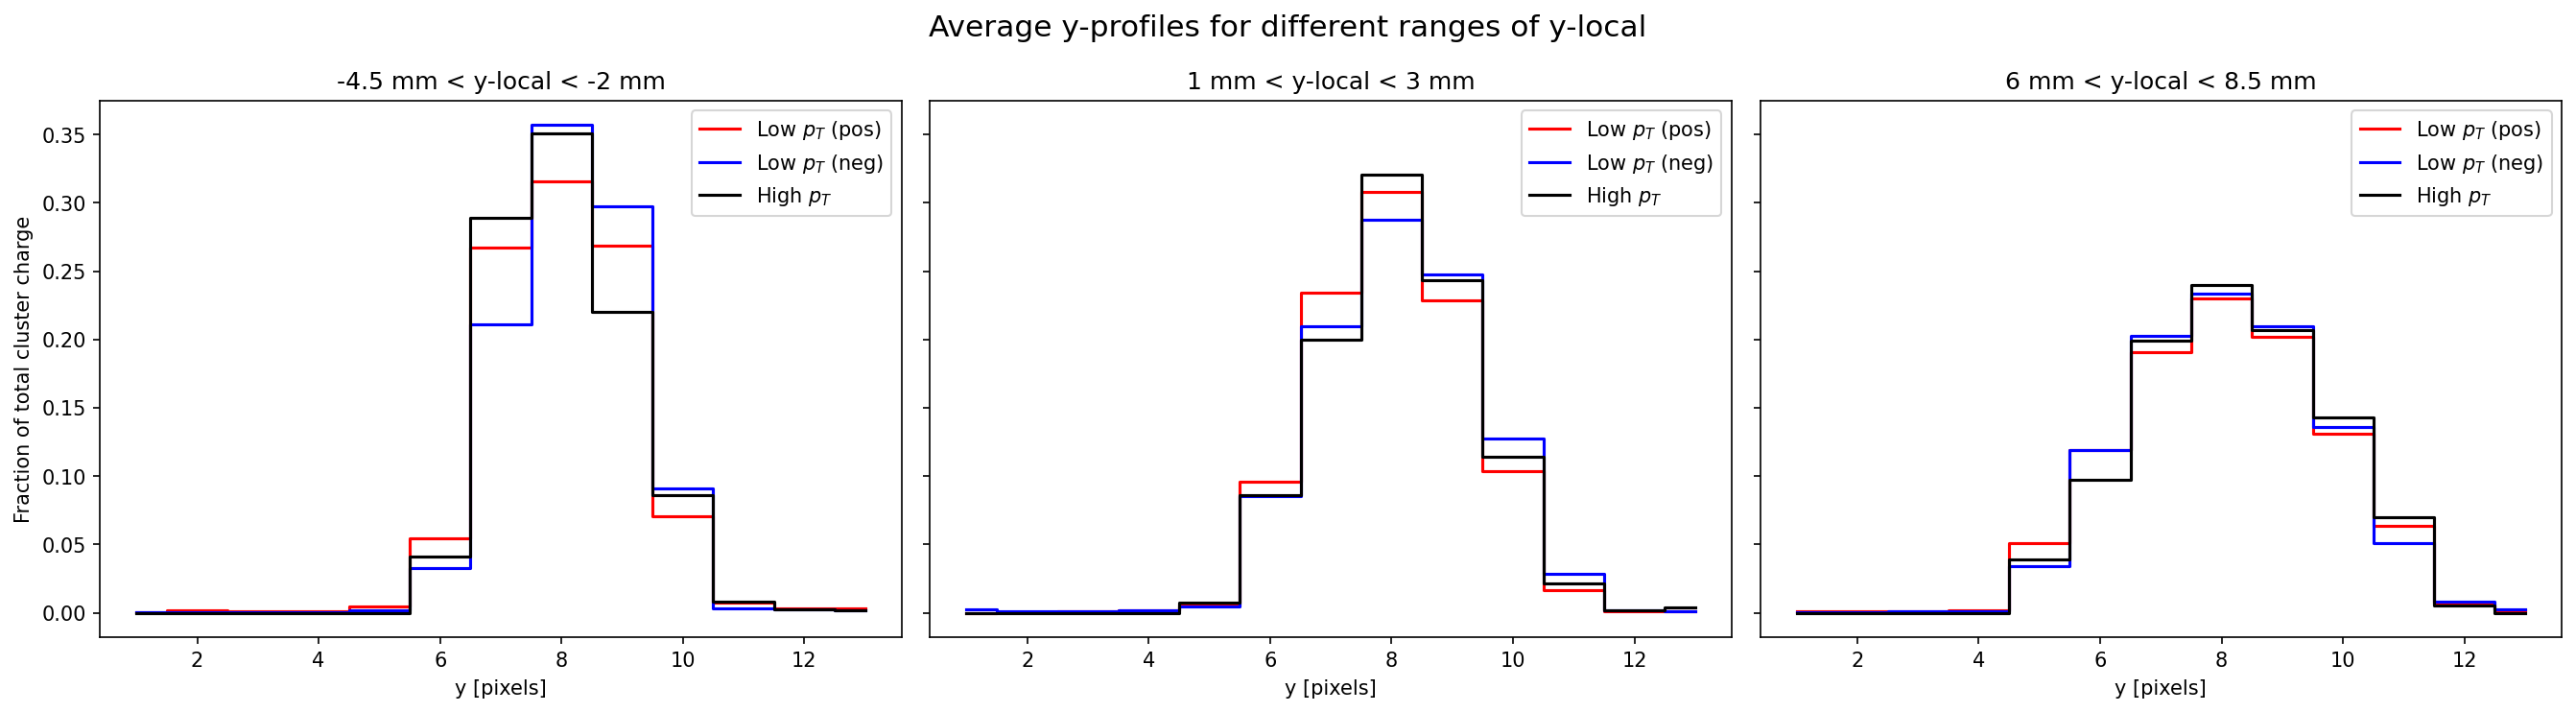

In [12]:
yaxis=np.arange(1,14,1)
fig, ax = plt.subplots(1,3, sharey=True, figsize=(18,5))
ax[0].step(yaxis,profileLowPos1, where="mid", label=r"Low $p_T$ (pos)", c ='r')
ax[0].step(yaxis,profileLowNeg1, where="mid", label=r"Low $p_T$ (neg)", c='b')
ax[0].step(yaxis,profileHigh1, where="mid", label=r"High $p_T$", c='k')
ax[0].legend()
ax[0].set_title("-4.5 mm < y-local < -2 mm")
ax[0].set_ylabel("Fraction of total cluster charge")
ax[0].set_xlabel("y [pixels]")

ax[1].step(yaxis,profileLowPos2, where="mid", label=r"Low $p_T$ (pos)", c ='r')
ax[1].step(yaxis,profileLowNeg2, where="mid", label=r"Low $p_T$ (neg)", c='b')
ax[1].step(yaxis,profileHigh2, where="mid", label=r"High $p_T$", c='k')
ax[1].legend()
ax[1].set_title("1 mm < y-local < 3 mm")
ax[1].set_xlabel("y [pixels]")

ax[2].step(yaxis,profileLowPos3, where="mid", label=r"Low $p_T$ (pos)", c ='r')
ax[2].step(yaxis,profileLowNeg3, where="mid", label=r"Low $p_T$ (neg)", c='b')
ax[2].step(yaxis,profileHigh3, where="mid", label=r"High $p_T$", c='k')
ax[2].legend()
ax[2].set_title("6 mm < y-local < 8.5 mm")
ax[2].set_xlabel("y [pixels]")

fig.suptitle('Average y-profiles for different ranges of y-local', fontsize=15)
plt.tight_layout()
plt.show()

In [13]:
def clusterSizeVsYlocal(truth, recon2D):
    clusterSize=[]
    intervals = np.arange(-5,9.5,1)
    for i in range(len(intervals)-1):
        cut1 = truth['y-local']>=intervals[i]
        cut2 = truth['y-local']<intervals[i+1]
        cut = cut1 & cut2
        tempRecon2D=recon2D[cut]
        clusterSize.append(getAverageClusterSize(tempRecon2D))
    return clusterSize

ylocals=np.arange(-4.5,9,1)

In [14]:
lowPosSize=clusterSizeVsYlocal(truthSigLowPos, recon2DSigLowPos)
lowNegSize=clusterSizeVsYlocal(truthSigLowNeg, recon2DSigLowNeg)
highSize=clusterSizeVsYlocal(truthSigHigh, recon2DSigHigh)

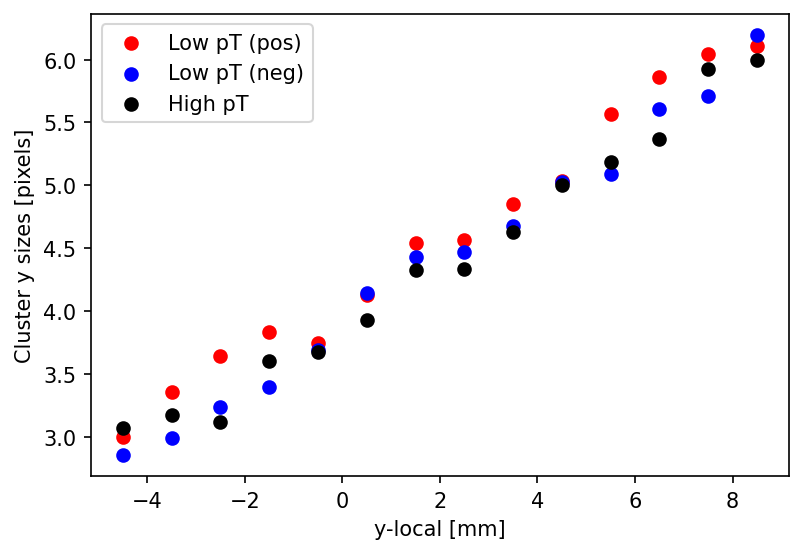

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(ylocals, lowPosSize, c='r', label="Low pT (pos)")
ax.scatter(ylocals, lowNegSize, c='b', label="Low pT (neg)")
ax.scatter(ylocals, highSize, c='k', label="High pT")
ax.set_xlabel("y-local [mm]")
ax.set_ylabel("Cluster y sizes [pixels]")
ax.legend()
plt.show()